In [2]:
# Import package
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.backend.backend())

tensorflow


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlflow
import tensorflow as tf

In [4]:
from data_windowing import WindowGenerator

In [5]:
print(os.getcwd())

c:\Users\Abdul Rahim\Desktop\Capstone Project\capstone_1


In [6]:
train_csv_path = os.path.join(os.getcwd(),r"datasets\cases_malaysia_train.csv")
test_csv_path = os.path.join(os.getcwd(),r"datasets\cases_malaysia_test.csv")

In [7]:
train_case_df = pd.read_csv(train_csv_path)
test_case_df = pd.read_csv(test_csv_path)

In [8]:
print(train_case_df.head())
print(test_case_df.head())

        date cases_new  cases_import  cases_recovered  cases_active  \
0  25/1/2020         4             4                0             4   
1  26/1/2020         0             0                0             4   
2  27/1/2020         0             0                0             4   
3  28/1/2020         0             0                0             4   
4  29/1/2020         3             3                0             7   

   cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0              0            4           0           0            0  ...   
1              0            0           0           0            0  ...   
2              0            0           0           0            0  ...   
3              0            0           0           0            0  ...   
4              0            3           0           0            0  ...   

   cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
0            0            0         0         

In [9]:
train_date_time = pd.to_datetime(train_case_df.pop('date'), format="%d/%m/%Y")
print(train_date_time.dtype)
test_date_time = pd.to_datetime(test_case_df.pop('date'), format="%d/%m/%Y")
print(test_date_time.dtype)

datetime64[ns]
datetime64[ns]


In [10]:
print(train_case_df.info())
print(test_case_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    object 
 1   cases_import             680 non-null    int64  
 2   cases_recovered          680 non-null    int64  
 3   cases_active             680 non-null    int64  
 4   cases_cluster            680 non-null    int64  
 5   cases_unvax              680 non-null    int64  
 6   cases_pvax               680 non-null    int64  
 7   cases_fvax               680 non-null    int64  
 8   cases_boost              680 non-null    int64  
 9   cases_child              680 non-null    int64  
 10  cases_adolescent         680 non-null    int64  
 11  cases_adult              680 non-null    int64  
 12  cases_elderly            680 non-null    int64  
 13  cases_0_4                680 non-null    int64  
 14  cases_5_11               6

In [11]:
print(train_case_df.isna().sum())
train_case_df = train_case_df.fillna(0)
print(train_case_df.isna().sum())

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64
cases_new                  0
cases_import               0

In [12]:
print(train_case_df[train_case_df['cases_new']=="?"])
print(train_case_df[train_case_df['cases_new']==" "])

    cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
273         ?            11              671          8953            789   
427         ?             5             1257         14127            494   
445         ?             6             1485         16625            689   
446         ?            19             1259         17510            896   
587         ?            14            22399        254719           2223   
640         ?            15             5607         72903            210   

     cases_unvax  cases_pvax  cases_fvax  cases_boost  cases_child  ...  \
273         1228           0           0            0           94  ...   
427         1187          12           0            0          185  ...   
445         1869          16           4            0          181  ...   
446         2132          10           6            0          188  ...   
587         8600        4766        6012            0         2925  ...   
640       

In [13]:
train_case_df = train_case_df.replace('?', np.nan)
train_case_df = train_case_df.replace(" ", np.nan)

print(train_case_df[train_case_df['cases_new'].isnull()])

    cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
98        NaN            11              116          1747             53   
217       NaN            10                8           153              0   
273       NaN            11              671          8953            789   
279       NaN             0              491         10380            392   
287       NaN             0             1029         11646            679   
427       NaN             5             1257         14127            494   
445       NaN             6             1485         16625            689   
446       NaN            19             1259         17510            896   
476       NaN             9             3432         41914            999   
587       NaN            14            22399        254719           2223   
615       NaN            14            15891        159932            868   
640       NaN            15             5607         72903            210   

In [14]:
row_numbers = train_case_df[train_case_df['cases_new'].isnull()].index
print(row_numbers)

Index([98, 217, 273, 279, 287, 427, 445, 446, 476, 587, 615, 640], dtype='int64')


In [15]:
for row_num in row_numbers:
    train_case_df.loc[row_num,'cases_new'] = train_case_df.loc[row_num,'cases_active']-train_case_df.loc[row_num-1,'cases_active']

In [16]:
print(train_case_df.info())
train_case_df['cases_new'] = train_case_df['cases_new'].astype('float64')
print(train_case_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    object 
 1   cases_import             680 non-null    int64  
 2   cases_recovered          680 non-null    int64  
 3   cases_active             680 non-null    int64  
 4   cases_cluster            680 non-null    int64  
 5   cases_unvax              680 non-null    int64  
 6   cases_pvax               680 non-null    int64  
 7   cases_fvax               680 non-null    int64  
 8   cases_boost              680 non-null    int64  
 9   cases_child              680 non-null    int64  
 10  cases_adolescent         680 non-null    int64  
 11  cases_adult              680 non-null    int64  
 12  cases_elderly            680 non-null    int64  
 13  cases_0_4                680 non-null    int64  
 14  cases_5_11               6

In [17]:
print(test_case_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                99 non-null     float64
 1   cases_import             100 non-null    int64  
 2   cases_recovered          100 non-null    int64  
 3   cases_active             100 non-null    int64  
 4   cases_cluster            100 non-null    int64  
 5   cases_unvax              100 non-null    int64  
 6   cases_pvax               100 non-null    int64  
 7   cases_fvax               100 non-null    int64  
 8   cases_boost              100 non-null    int64  
 9   cases_child              100 non-null    int64  
 10  cases_adolescent         100 non-null    int64  
 11  cases_adult              100 non-null    int64  
 12  cases_elderly            100 non-null    int64  
 13  cases_0_4                100 non-null    int64  
 14  cases_5_11               10

In [18]:
print(test_case_df.loc[test_case_df['cases_new'].isnull()])
row_index = test_case_df.loc[test_case_df['cases_new'].isnull()].index
row_index = row_index[0]
print(row_index)

    cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
60        NaN           130             3968         61383            374   

    cases_unvax  cases_pvax  cases_fvax  cases_boost  cases_child  ...  \
60         1122          34        3058         1506          847  ...   

    cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
60          251          102        32               0                  0   

    cluster_community  cluster_highRisk  cluster_education  \
60                  4                14                279   

    cluster_detentionCentre  cluster_workplace  
60                        4                 73  

[1 rows x 30 columns]
60


In [19]:
print(test_case_df.loc[row_index,'cases_new'])
test_case_df.loc[row_index,'cases_new'] = test_case_df.loc[row_index,'cases_active']-test_case_df.loc[row_index-1,'cases_active']
print(test_case_df.loc[row_index,'cases_new'])

nan
1745.0


In [20]:
print(test_case_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                100 non-null    float64
 1   cases_import             100 non-null    int64  
 2   cases_recovered          100 non-null    int64  
 3   cases_active             100 non-null    int64  
 4   cases_cluster            100 non-null    int64  
 5   cases_unvax              100 non-null    int64  
 6   cases_pvax               100 non-null    int64  
 7   cases_fvax               100 non-null    int64  
 8   cases_boost              100 non-null    int64  
 9   cases_child              100 non-null    int64  
 10  cases_adolescent         100 non-null    int64  
 11  cases_adult              100 non-null    int64  
 12  cases_elderly            100 non-null    int64  
 13  cases_0_4                100 non-null    int64  
 14  cases_5_11               10

In [21]:
train_case_df = train_case_df.astype('float64')
test_case_df = test_case_df.astype('float64')

In [22]:
print(train_case_df.info())
print(test_case_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    float64
 1   cases_import             680 non-null    float64
 2   cases_recovered          680 non-null    float64
 3   cases_active             680 non-null    float64
 4   cases_cluster            680 non-null    float64
 5   cases_unvax              680 non-null    float64
 6   cases_pvax               680 non-null    float64
 7   cases_fvax               680 non-null    float64
 8   cases_boost              680 non-null    float64
 9   cases_child              680 non-null    float64
 10  cases_adolescent         680 non-null    float64
 11  cases_adult              680 non-null    float64
 12  cases_elderly            680 non-null    float64
 13  cases_0_4                680 non-null    float64
 14  cases_5_11               6

In [23]:
train_case_df_copy = train_case_df.copy()
test_case_df_copy = test_case_df.copy()
train_case_df_copy.index = train_date_time
test_case_df_copy.index = test_date_time

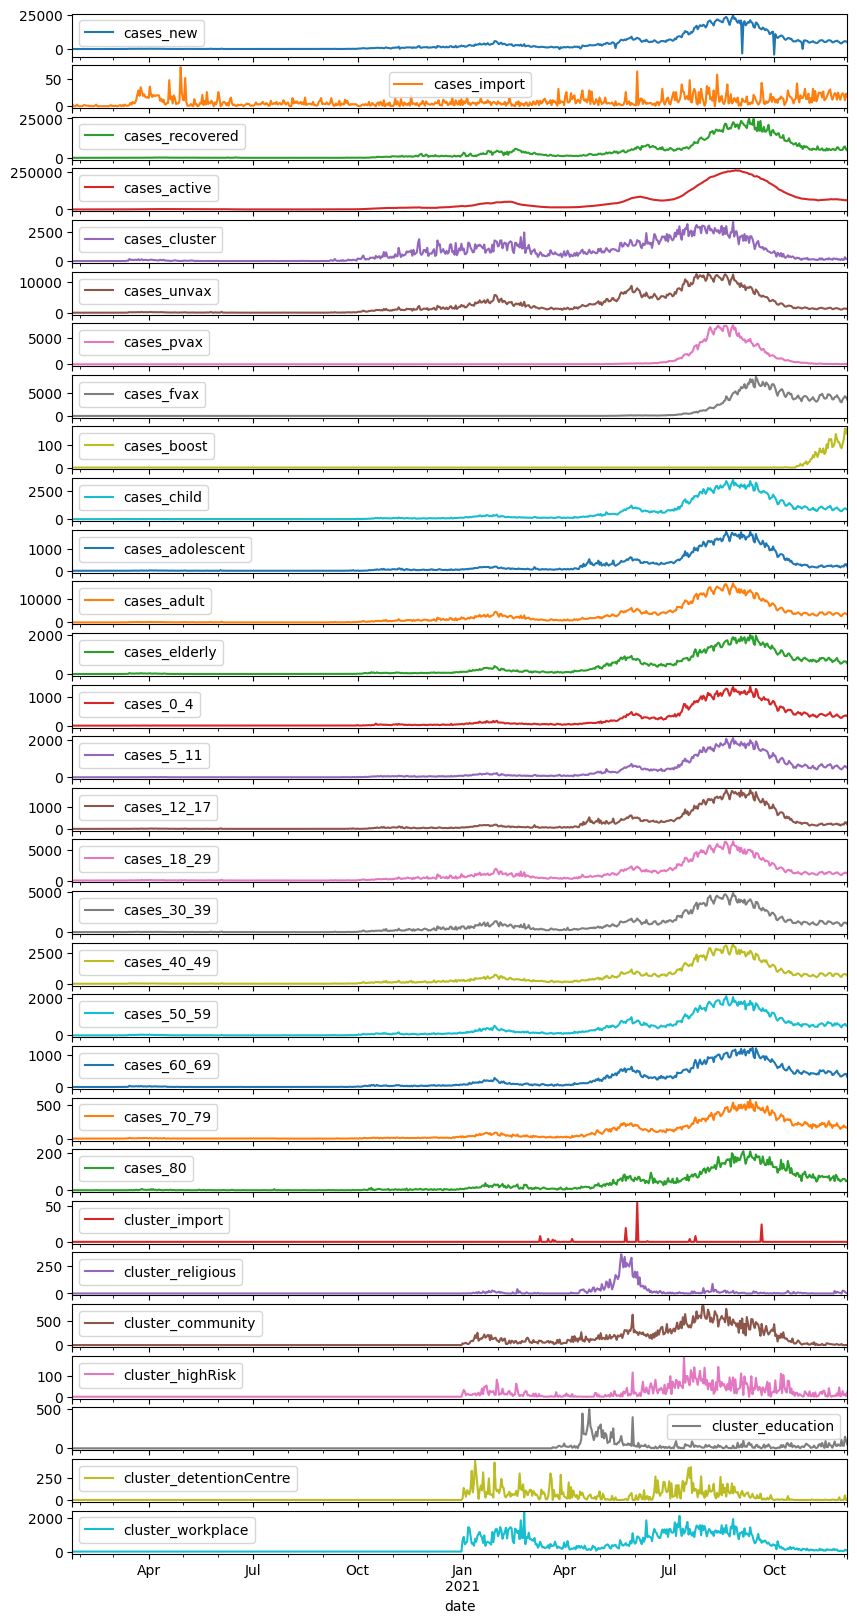

In [24]:
train_case_df_copy.plot(subplots=True,figsize=(10,20))
plt.show()

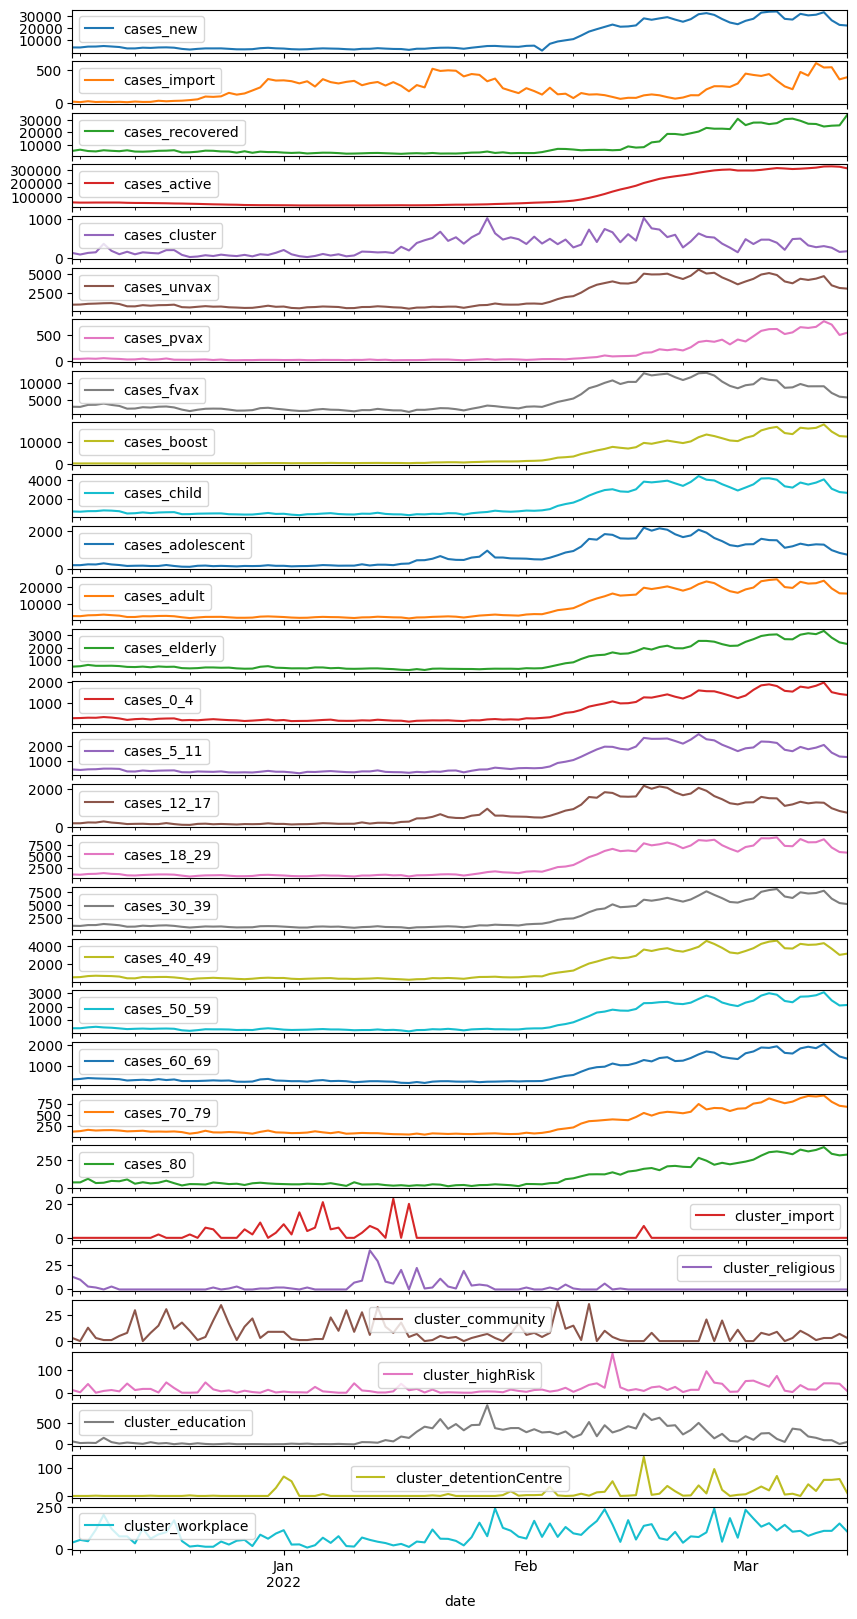

In [25]:
test_case_df_copy.plot(subplots=True,figsize=(10,20))
plt.show()

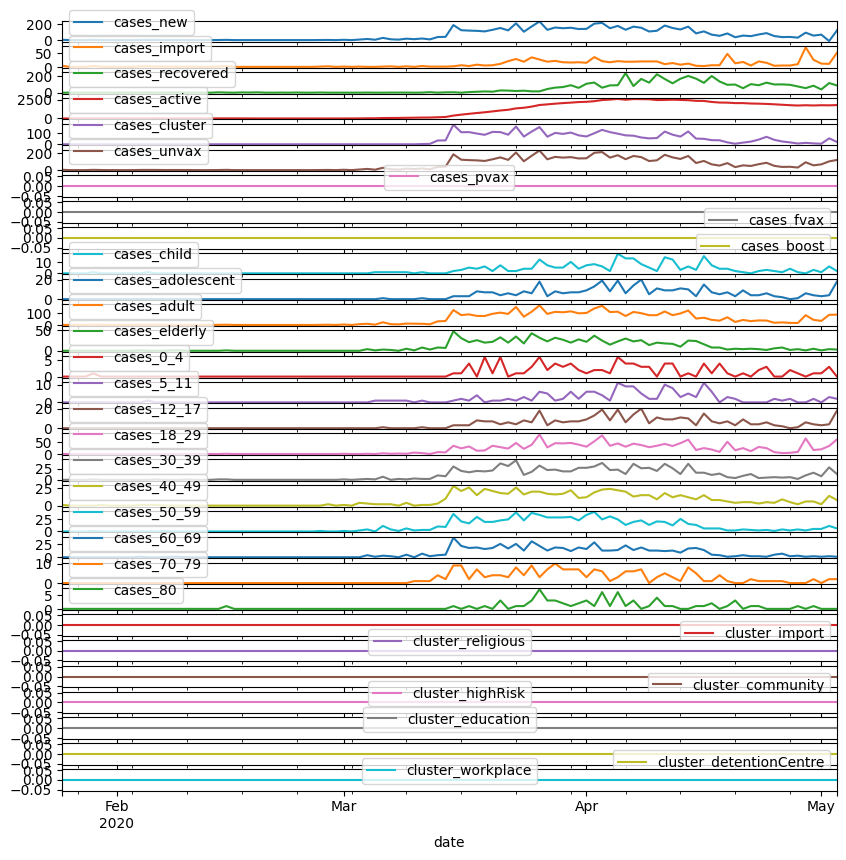

In [26]:
train_case_df_copy[:100].plot(subplots=True,figsize=(10,10))
plt.show()

In [27]:
train_rows = len(train_case_df.index)
test_rows = len(test_case_df.index)
print(train_rows,test_rows)
split_num = int(test_rows/2)
print(split_num)

680 100
50


In [28]:
train_data = train_case_df
test_data = test_case_df[:split_num]
val_data = test_case_df[split_num:]

In [29]:
print(test_data.shape,val_data.shape)

(50, 30) (50, 30)


In [30]:
#num_features = train_case_df.shape[1]

In [31]:
train_mean = train_data.mean()
train_std = train_data.std()

train_df = (train_data - train_mean) / train_std
val_df = (val_data - train_mean) / train_std
test_df = (test_data - train_mean) / train_std

In [32]:
cases_columns = list(train_data.columns)
print(cases_columns)
chosen_column = 'cases_active'
print(chosen_column)

['cases_new', 'cases_import', 'cases_recovered', 'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import', 'cluster_religious', 'cluster_community', 'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre', 'cluster_workplace']
cases_active


TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None)


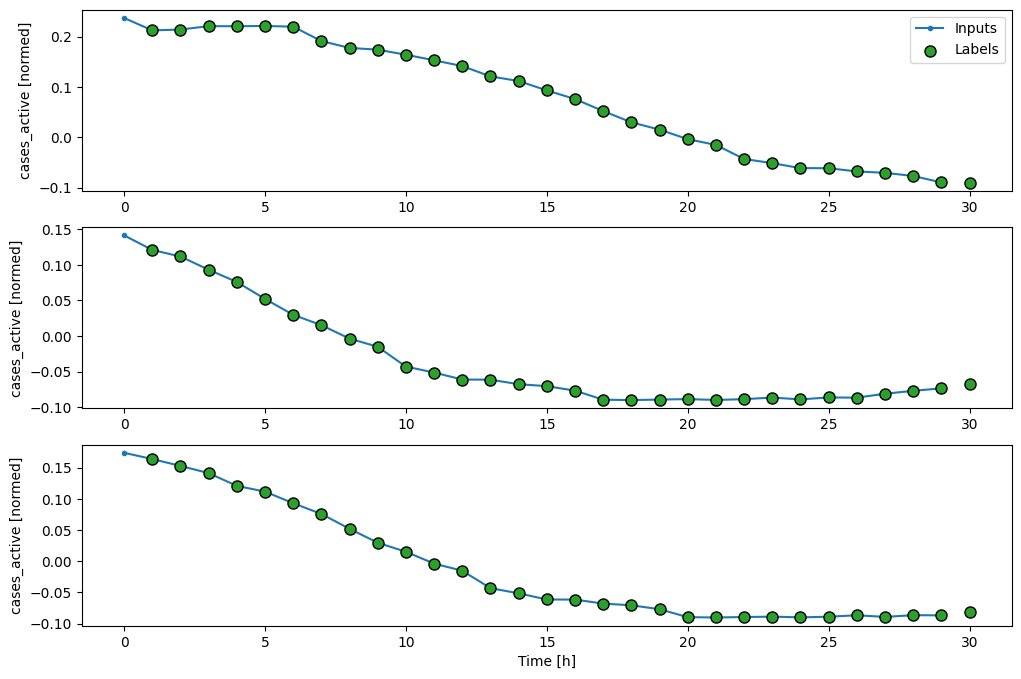

In [33]:
data_window = WindowGenerator(30,30,1,train_df,val_df,test_df,label_columns=[chosen_column])
data_window.plot(plot_col=chosen_column)
print(data_window.train.element_spec[1])

In [34]:
mlflow.set_experiment("Covid-19 Prediction")

<Experiment: artifact_location='file:///c:/Users/Abdul%20Rahim/Desktop/Capstone%20Project/capstone_1/mlruns/581382817259276443', creation_time=1736394668485, experiment_id='581382817259276443', last_update_time=1736394668485, lifecycle_stage='active', name='Covid-19 Prediction', tags={}>

In [35]:
model_single_32_units = keras.Sequential()
model_single_32_units.add(keras.layers.LSTM(32,return_sequences=True))
model_single_32_units.add(keras.layers.Dense(1))
model_single_32_units.summary()

model_single_32_units.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_single_64_units = keras.Sequential()
model_single_64_units.add(keras.layers.LSTM(64,return_sequences=True))
model_single_64_units.add(keras.layers.Dense(1))
model_single_64_units.summary()

model_single_64_units.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_single_128_units = keras.Sequential()
model_single_128_units.add(keras.layers.LSTM(128,return_sequences=True))
model_single_128_units.add(keras.layers.Dense(1))
model_single_128_units.summary()

model_single_128_units.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_single_256_units = keras.Sequential()
model_single_256_units.add(keras.layers.LSTM(256,return_sequences=True))
model_single_256_units.add(keras.layers.Dense(1))
model_single_256_units.summary()

model_single_256_units.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,verbose=1)
MAX_EPOCHS = 100

In [40]:
with mlflow.start_run(run_name="lstm_32_units") as run:
    mlflow.tensorflow.autolog()
    history_32 = model_single_32_units.fit(data_window.train,validation_data=data_window.val,epochs=MAX_EPOCHS,callbacks=[early_stopping])

2025/01/09 15:15:01 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential' has no defined input shape yet.


Epoch 1/100
15/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2583 - mae: 0.8061

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.0703 - mae: 0.7182 - val_loss: 7.6144 - val_mae: 2.3602
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1212 - mae: 0.2484 - val_loss: 8.0434 - val_mae: 2.4531
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0615 - mae: 0.1726 - val_loss: 8.1909 - val_mae: 2.4878
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0335 - mae: 0.1146 - val_loss: 8.0169 - val_mae: 2.4517
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0242 - mae: 0.0929 - val_loss: 7.6812 - val_mae: 2.3850
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0204 - mae: 0.0809 - val_loss: 7.6936 - val_mae: 2.3836
Epoch 6: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [41]:
with mlflow.start_run(run_name="lstm_64_units") as run:
    mlflow.tensorflow.autolog()
    history_64 = model_single_64_units.fit(data_window.train,validation_data=data_window.val,epochs=MAX_EPOCHS,callbacks=[early_stopping])


2025/01/09 15:15:15 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_1' has no defined input shape yet.


Epoch 1/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6126 - mae: 0.5252

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.5565 - mae: 0.4943 - val_loss: 5.9776 - val_mae: 2.0950
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0484 - mae: 0.1530 - val_loss: 6.0404 - val_mae: 2.1058
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mae: 0.0985 - val_loss: 6.0233 - val_mae: 2.1029
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0167 - mae: 0.0727 - val_loss: 6.0241 - val_mae: 2.1030
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mae: 0.0631 - val_loss: 6.0287 - val_mae: 2.1038
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mae: 0.0570 - val_loss: 6.0313 - val_mae: 2.1041
Epoch 6: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [42]:
with mlflow.start_run(run_name="lstm_128_units") as run:
    mlflow.tensorflow.autolog()
    history_128 = model_single_128_units.fit(data_window.train,validation_data=data_window.val,epochs=MAX_EPOCHS,callbacks=[early_stopping])

2025/01/09 15:15:28 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_2' has no defined input shape yet.


Epoch 1/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5071 - mae: 0.4237

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4665 - mae: 0.4039 - val_loss: 4.1107 - val_mae: 1.6694
Epoch 2/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0327 - mae: 0.1147

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0316 - mae: 0.1129 - val_loss: 3.2689 - val_mae: 1.4952
Epoch 3/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0150 - mae: 0.0665

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0147 - mae: 0.0661 - val_loss: 2.8331 - val_mae: 1.3844
Epoch 4/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0111 - mae: 0.0560

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mae: 0.0557 - val_loss: 2.7255 - val_mae: 1.3609
Epoch 5/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mae: 0.0498

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090 - mae: 0.0498 - val_loss: 2.6664 - val_mae: 1.3495
Epoch 6/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086 - mae: 0.0486

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0085 - mae: 0.0484 - val_loss: 2.5894 - val_mae: 1.3321
Epoch 7/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mae: 0.0453

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0069 - mae: 0.0452 - val_loss: 2.5161 - val_mae: 1.3176
Epoch 8/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0068 - mae: 0.0439

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0067 - mae: 0.0437 - val_loss: 2.4785 - val_mae: 1.3117
Epoch 9/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0056 - mae: 0.0408

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0056 - mae: 0.0408 - val_loss: 2.4392 - val_mae: 1.3036
Epoch 10/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0049 - mae: 0.0394

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0049 - mae: 0.0394 - val_loss: 2.3855 - val_mae: 1.2919
Epoch 11/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0043 - mae: 0.0387

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0043 - mae: 0.0386 - val_loss: 2.3372 - val_mae: 1.2829
Epoch 12/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - mae: 0.0361

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0039 - mae: 0.0363 - val_loss: 2.3158 - val_mae: 1.2795
Epoch 13/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0036 - mae: 0.0359

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0036 - mae: 0.0359 - val_loss: 2.2979 - val_mae: 1.2770
Epoch 14/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0033 - mae: 0.0354

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0033 - mae: 0.0353 - val_loss: 2.2909 - val_mae: 1.2766
Epoch 15/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031 - mae: 0.0334

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031 - mae: 0.0334 - val_loss: 2.2863 - val_mae: 1.2767
Epoch 16/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0029 - mae: 0.0327 - val_loss: 2.2922 - val_mae: 1.2787
Epoch 17/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0027 - mae: 0.0323 - val_loss: 2.2957 - val_mae: 1.2800
Epoch 18/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0024 - mae: 0.0299 - val_loss: 2.2978 - val_mae: 1.2819
Epoch 19/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0023 - mae: 0.0297 - val_loss: 2.3144 - val_mae: 1.2885
Epoch 20/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022 - mae: 0.0287 - val_loss: 2.3755 - val_mae: 1.3066
Epoch 20: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [43]:
with mlflow.start_run(run_name="lstm_256_units") as run:
    mlflow.tensorflow.autolog()
    history_256 = model_single_256_units.fit(data_window.train,validation_data=data_window.val,epochs=MAX_EPOCHS,callbacks=[early_stopping])

2025/01/09 15:15:49 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_3' has no defined input shape yet.


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4853 - mae: 0.4296

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.4730 - mae: 0.4231 - val_loss: 6.4371 - val_mae: 2.1627
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0294 - mae: 0.1165

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0292 - mae: 0.1158 - val_loss: 6.1907 - val_mae: 2.1205
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0145 - mae: 0.0683 - val_loss: 6.3782 - val_mae: 2.1655
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0111 - mae: 0.0556 - val_loss: 6.5545 - val_mae: 2.2045
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0088 - mae: 0.0493 - val_loss: 6.6281 - val_mae: 2.2160
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0083 - mae: 0.0483 - val_loss: 6.7632 - val_mae: 2.2464
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0072 - mae: 0.0466 - val_loss: 6.8969 - val_mae: 2.2769
Epoch 7: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


In [47]:
model_load = mlflow.tensorflow.load_model(model_uri=f"models:/best_lstm_model/3")
type(model_load)

d:\anaconda3\envs\ypai10\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


keras.src.models.sequential.Sequential

In [48]:
predictions = model_load.predict(data_window.test)
predictions_squeezed = predictions.squeeze(axis=-1)  # Remove the last dimension
predictions_df = pd.DataFrame(predictions_squeezed)
print(predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
          0         1         2         3         4         5         6   \
0   0.111472  0.087581  0.162679  0.169239  0.185302  0.259237  0.220776   
1   0.167487  0.174851  0.077344 -0.069581 -0.092120 -0.216516 -0.254034   
2   0.141774  0.163033  0.187076  0.255357  0.218574  0.116928 -0.034022   
3   0.186183  0.196330  0.122366  0.177018  0.177691  0.187648  0.261570   
4   0.151876  0.260033  0.275911  0.277590  0.338444  0.333917  0.300100   
5   0.101736  0.164973  0.240184  0.209320  0.107708 -0.042851 -0.073963   
6   0.202318  0.265974  0.336045  0.332992  0.291171  0.184138  0.210477   
7   0.121440  0.213498  0.191508  0.090688 -0.057741 -0.084591 -0.217756   
8   0.204527  0.257457  0.269200  0.331666  0.328531  0.292880  0.186297   
9  -0.047482 -0.150293 -0.393059 -0.483128 -0.577203 -0.741731 -0.770298   
10  0.220442  0.278398  0.244657  0.149492  0.190778  0.186479  0.190773   
11 -0.070913 -0.175094 -0.254149 -0.475862 -0.536

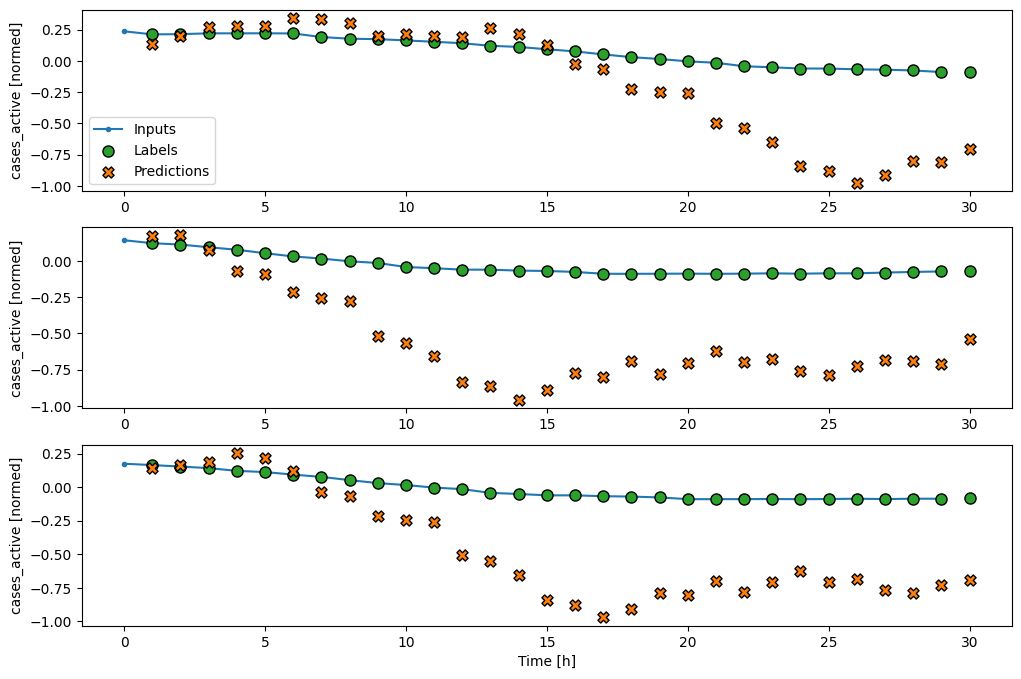

In [49]:
data_window.plot(plot_col=chosen_column,model=model_load)

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model_load, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
